# Pre-Modeling: Data Preprocessing and Feature Exploration in Python

In [16]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('adult.csv', na_values=['#NAME?'])

In [17]:
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [18]:
print(df['income'].value_counts())
print(df['income'][0])

<=50K    37155
>50K     11687
Name: income, dtype: int64
<=50K


In [19]:
df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]

X = df.drop('income', 1)
y=df.income
print(X.head())

In [21]:
print(y.head())

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64


# Basic Data Cleaning

In [22]:
print(X['education'].head())

0            11th
1         HS-grad
2      Assoc-acdm
3    Some-college
4    Some-college
Name: education, dtype: object


In [24]:
print(pd.get_dummies(X['education']).head())

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  Assoc-voc  \
0     0     1     0        0        0        0    0           0          0   
1     0     0     0        0        0        0    0           0          0   
2     0     0     0        0        0        0    0           1          0   
3     0     0     0        0        0        0    0           0          0   
4     0     0     0        0        0        0    0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          0          0        0        0          0            0   
1          0          0        1        0          0            0   
2          0          0        0        0          0            0   
3          0          0        0        0          0            0   
4          0          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             1  
4             1  


In [26]:
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'marital-status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'gender' has 2 unique categories
Feature 'native-country' has 42 unique categories


In [28]:
print(X['native-country'].value_counts().sort_values(ascending=False).head(10))

United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
Name: native-country, dtype: int64


In [30]:
X['native-country'] = ['United States ' if x =='United-States' else 'Other' for x in X['native-country']]
print(X['native-country'].value_counts().sort_values(ascending=False))

United States     43832
Other              5010
Name: native-country, dtype: int64


In [34]:
todummy_list = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [35]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [36]:
X = dummy_df(X, todummy_list)
print(X.head())

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            0                      0                    0   
1            0                      0                    0   
2            0                      0                    1   
3            0                      0                    0   
4            1                      0                    0   

   workclass_Never-worked  ...  relationship_Wife  race_Amer-Indian-Eskimo  \
0                       0  ...                  0                        0

## Handle Missing Data

In [37]:
X.isnull().sum().sort_values(ascending=False).head()

native-country_United States     0
education_Bachelors              0
education_1st-4th                0
education_5th-6th                0
education_7th-8th                0
dtype: int64

In [44]:
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values='NaN', strategy='median')
#imp.fit(X)
#X = pd.DataFrame(data=imp.transform(X), columns=X.columns)

# No Missing Data

# More Data Exploration

## Tukey IQR

In [46]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [47]:
tukey_indices, tukey_values = find_outliers_tukey(X['age'])
print(np.sort(tukey_values))

[79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79
 79 79 79 79 79 79 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 81 81 81 81
 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81
 81 81 81 81 81 81 81 81 81 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82
 83 83 83 83 83 83 83 83 83 83 83 84 84 84 84 84 84 84 84 84 84 84 84 84
 85 85 85 85 85 86 87 87 87 88 88 88 88 88 88 89 89 90 90 90 90 90 90 90
 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90
 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90]


## Kernel Density Estimation

In [49]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

In [51]:
def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott', fft=True)
    pred = kde.evaluate(x_scaled)
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [52]:
kde_indices, kde_values = find_outliers_kde(X['age'])
print(np.sort(kde_values))

[69 69 69 ... 90 90 90]


In [53]:
import matplotlib.pyplot as plt

In [56]:
def plot_histogram(x):
    plt.hist(x, bins=100, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    

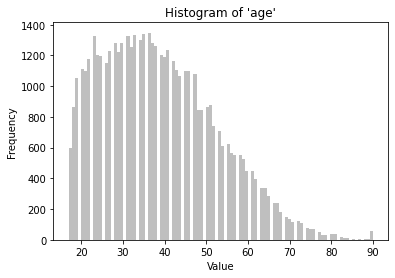

In [57]:
plot_histogram(X['age'])

In [58]:
def plot_histogram_dv(x, y):
    plt.hist(list(x[y==0]), alpha=0.5, label='DV=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='DV=1') 
    plt.title("Histogram of '{var_name}' by DV Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

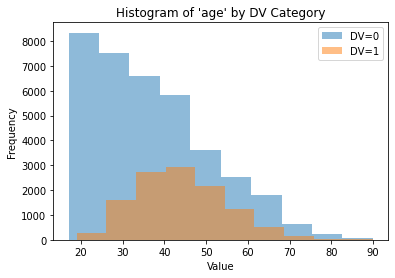

In [59]:
plot_histogram_dv(X['age'], y)

# Feature Engineering

In [60]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

In [61]:
def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # find interacations
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # remove interaction terms with all 0 values
    noint_indices = [i for i, x in enumerate(list((df==0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis=1)
    return df

In [62]:
X = add_interactions(X)
print(X.head())

    age    fnlwgt  educational-num  capital-gain  capital-loss  \
0  25.0  226802.0              7.0           0.0           0.0   
1  38.0   89814.0              9.0           0.0           0.0   
2  28.0  336951.0             12.0           0.0           0.0   
3  44.0  160323.0             10.0        7688.0           0.0   
4  18.0  103497.0             10.0           0.0           0.0   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            40.0          0.0                    0.0                  0.0   
1            50.0          0.0                    0.0                  0.0   
2            40.0          0.0                    0.0                  1.0   
3            40.0          0.0                    0.0                  0.0   
4            30.0          1.0                    0.0                  0.0   

   workclass_Never-worked  ...  race_Other_native-country_Other  \
0                     0.0  ...                              0.0   


# Dimensionality reduction using PCA

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))
print(X_pca.head())

              0             1             2             3             4  \
0 -2.017217e+08 -1.667885e+07  1.873905e+05 -2.091049e+06 -3.544552e+05   
1 -2.017239e+08 -1.672363e+07 -4.771779e+06 -6.290287e+05 -3.632957e+05   
2 -2.017189e+08 -1.662251e+07  6.289177e+06 -2.365242e+06  1.158349e+06   
3  1.030840e+09 -1.504992e+07 -1.372122e+06  7.329805e+05 -1.450348e+05   
4 -2.017248e+08 -1.674194e+07 -6.785342e+06 -8.440193e+05  1.839778e+05   

              5              6              7             8             9  
0  24953.578175  103135.855186 -187413.408925 -64858.147127  70038.487334  
1  40006.136504  -95078.468963    -933.388225  34032.387052  39940.258988  
2 -46306.506760 -436786.729551  133283.379622 -11838.049430  18582.362845  
3 -85369.487601 -120519.281867   -2672.819470  26641.511608  -5979.101620  
4  37700.998414   59157.264121   34905.311416  -5303.783185 -73581.079647  


# Feature selection and model building

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [67]:
print(df.shape)
print(X.shape)

(48842, 15)
(48842, 1891)


In [68]:
import sklearn.feature_selection

In [69]:
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

/usr/local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 350  663  824  829  834  992 1127 1164 1208 1315 1324 1327 1437 1628
 1631] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/usr/local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [70]:
colnames_selected

['educational-num',
 'marital-status_Married-civ-spouse',
 'relationship_Husband',
 'age_educational-num',
 'age_marital-status_Married-civ-spouse',
 'age_relationship_Husband',
 'fnlwgt_marital-status_Married-civ-spouse',
 'fnlwgt_relationship_Husband',
 'educational-num_hours-per-week',
 'educational-num_marital-status_Married-civ-spouse',
 'educational-num_relationship_Husband',
 'hours-per-week_marital-status_Married-civ-spouse',
 'hours-per-week_relationship_Husband',
 'marital-status_Married-civ-spouse_relationship_Husband',
 'marital-status_Married-civ-spouse_race_White',
 'marital-status_Married-civ-spouse_gender_Male',
 'marital-status_Married-civ-spouse_native-country_United States ',
 'relationship_Husband_race_White',
 'relationship_Husband_gender_Male',
 'relationship_Husband_native-country_United States ']

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [76]:
def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [77]:
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.80216807168276


## Build model using unprocess data

In [78]:
df_unprocessed = df
df_unprocessed = df_unprocessed.dropna(axis=0, how='any')
print(df.shape)
print(df_unprocessed.shape)

(48842, 15)
(48842, 15)


In [80]:
# Remove non-numeric columns
for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32', 'int64', 'float32', 'float64']:
        df_unprocessed = df_unprocessed.drop(col_name,1)

In [81]:
# Split into features and outcomes
X_unprocessed = df_unprocessed.drop('income', 1)
y_unprocessed = df_unprocessed.income

In [82]:
print(X_unprocessed.head())

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0   25  226802                7             0             0              40
1   38   89814                9             0             0              50
2   28  336951               12             0             0              40
3   44  160323               10          7688             0              40
4   18  103497               10             0             0              30


In [ ]:
X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(X_unprocessed, y_unprocessed, )